In [139]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('gis_opex_international_raw_trac.csv',sep=';')

In [143]:
fmt = '%d.%m.%Y %H:%M'
df['sea_dat_ank_hafen'] = df['sea_dat_ank_hafen'].astype("string")
df['sea_eta_pod'] = df['sea_eta_pod'].astype("string")
#df

df['sea_dat_ank_hafen']= pd.to_datetime(df['sea_dat_ank_hafen']).apply(lambda dt_entry: dt_entry.round(freq="H"))
df['sea_eta_pod']= pd.to_datetime(df['sea_eta_pod']).apply(lambda dt_entry: dt_entry.round(freq="H"))
df["delays"] = (df["sea_dat_ank_hafen"] - df["sea_eta_pod"]).dt.total_seconds() / 60.0
df


,container,schiff,sea_etd_pol,sea_eta_pod,sea_dat_ank_hafen,sea_dat_cont_entl,sea_dat_abf_hafen,sea_dat_ank_vz,pod_id,pod_name,pod_land,delays
0,HLBU3284461,AL NASRIYAH,27.11.2020 00:00,2021-12-01,2021-12-01,13.01.2021 00:00,18.01.2021 00:00,NaN,NaN,NaN,NaN,0.0
1,MSKU6283599,MILAN MAERSK,24.11.2020 00:00,2020-12-26,2020-12-29,29.12.2020 00:00,22.01.2021 00:00,27.01.2021 00:00,NaN,NaN,NaN,4320.0
2,MRKU0657914,MSC PALOMA,08.11.2020 00:00,2020-10-12,2020-10-12,11.12.2020 00:00,04.01.2021 00:00,06.01.2021 00:00,NaN,NaN,NaN,0.0
3,CGMU5409490,COSCO SHIPPING LIBRA,21.08.2020 00:00,2020-06-10,2020-06-10,06.10.2020 00:00,10.10.2020 00:00,19.10.2020 00:00,NaN,NaN,NaN,0.0
4,MRKU7869258,MSC NEW YORK,16.10.2020 00:00,2020-11-12,2020-11-12,12.12.2020 00:00,20.12.2020 00:00,31.12.2020 00:00,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10521,CLHU4801524,YM FOUNTAIN,05.07.2022 00:00,2022-07-30,2022-02-08,02.08.2022 00:00,12.08.2022 00:00,31.08.2022 00:00,RTM,Rotterdam,NL,-247680.0
10522,MEDU7949584,MUNICH MAERSK,11.07.2022 00:00,2022-08-26,2022-08-26,27.08.2022 00:00,NaN,NaN,RTM,Rotterdam,NL,0.0
10523,MSMU1992340,MUMBAI MAERSK,06.07.2022 00:00,2022-12-08,2022-12-08,NaN,23.08.2022 00:00,NaN,RTM,Rotterdam,NL,0.0
10524,PONU1865787,MANILA MAERSK,05.07.2022 00:00,2022-07-31,2022-07-31,01.08.2022 00:00,16.08.2022 00:00,30.08.2022 00:00,RTM,Rotterdam,NL,0.0


In [178]:
df[((df["delays"] / 60) < 20) & ((df["delays"] / 60) > 0)]

,container,schiff,sea_etd_pol,sea_eta_pod,sea_dat_ank_hafen,sea_dat_cont_entl,sea_dat_abf_hafen,sea_dat_ank_vz,pod_id,pod_name,pod_land,delays


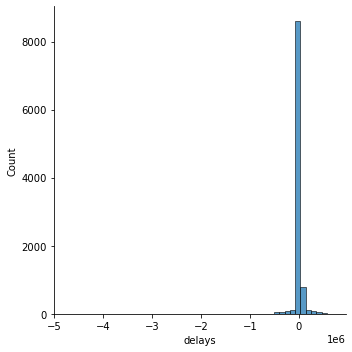

In [145]:
sns.displot(df, x="delays",bins=50)
#plt.xlim(-3000, 3000)


In [146]:
df2 = pd.read_csv("gis_opex_international_raw.csv",sep=";")
merged_df = pd.merge(df,df2,on="container")

In [149]:
proviamo  =merged_df[['container','schiff_x','delays','pol_name','pod_name_y','imo_nr']]

In [152]:
proviamo = proviamo[proviamo["imo_nr"].notna()] 
proviamo["imo_nr"] = proviamo["imo_nr"].astype("int")
proviamo

/var/folders/7g/2ds3y3yd6319x1125r61pg1c0000gn/T/ipykernel_52544/927576637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proviamo["imo_nr"] = proviamo["imo_nr"].astype("int")


,container,schiff_x,delays,pol_name,pod_name_y,imo_nr
2,FTAU1264292,MSC FEBE,8640.0,Yantian,Genoa,9839478
3,FTAU1264292,MSC FEBE,8640.0,Yantian,Genoa,9839478
4,FTAU1264292,MSC FEBE,8640.0,Yantian,Genoa,9839478
5,MSCU5844525,MOSCOW MAERSK,0.0,Ningbo,Antwerpen,9778818
6,MSCU5844525,MOSCOW MAERSK,0.0,Ningbo,Antwerpen,9778818
...,...,...,...,...,...,...
37582,MEDU7949584,MUNICH MAERSK,0.0,Dalian,Rotterdam,9778806
37583,MSMU1992340,MUMBAI MAERSK,0.0,Tianjinxingang,Rotterdam,9780471
37584,MSMU1992340,MUMBAI MAERSK,0.0,Tianjinxingang,Rotterdam,9780471
37585,PONU1865787,MANILA MAERSK,0.0,Yantian Pt,Rotterdam,9780469


In [153]:
df3 = pd.read_csv("gis_opex_international_shiptrac.csv",sep=";")
final = pd.merge(proviamo,df3,left_on="imo_nr",right_on="imo_number")

In [154]:
boh = final.groupby(["pol_name","pod_name_y"]).destination.unique().to_frame().reset_index()

In [156]:
finale_ale = pd.merge(proviamo,boh,on=["pol_name","pod_name_y"])

finale_ale = finale_ale[~finale_ale['destination'].apply(tuple).duplicated()]

In [157]:
finale_ale["delays"] = finale_ale["delays"] / 60

/Users/giomonopoli/miniconda3/envs/adaexam/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2000.0)

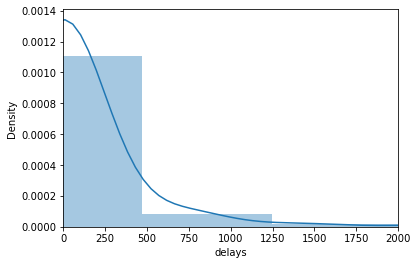

In [158]:
sns.distplot((finale_ale["delays"]),bins=10)
plt.xlim((0,2000))

In [160]:
finale_ale = finale_ale[(finale_ale["delays"] > 0) & (finale_ale["delays"] < 1500)]

In [179]:
finale_ale['quantile_ex_1'] = pd.qcut(finale_ale["delays"], q=2,labels=False)

In [180]:
finale_ale = finale_ale.dropna(subset=['delays'])

In [181]:
#0 = 24 -60 days
#1 = more than 60 days

In [187]:
finale_ale["Severity_delay"] = finale_ale["quantile_ex_1"].apply(lambda x: 'Critical' if x == 1 else 'Severe')

In [189]:
finale_ale.to_csv("delay_severity_trips.csv",index=False)